<a href="https://www.kaggle.com/code/anshtanwar/download-process-load-images-web-scraping?scriptVersionId=138197254" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left"><div style="background-color:#fff1cc; padding: 60px;"><center>⭐Scrape, Process, Load Images like a digital sorcerer with just a single class of functions⭐</center></div> 


<div style="background-color:#d4ebf2; padding: 10px;" style="font-size:30px;">⭐ Discover the thrilling world of image scraping without spending a penny or fumbling with API keys!<br><br>🪄 In this tutorial, I'll guide you through a single powerful class of functions that handles everything from scraping images to cropping, resizing, removing duplicates, and renaming them.<br><br>🤖 All you need is the Bing-image-generator, and you're all set to embark on this adventure.Get ready to create your own mesmerizing image collection like a digital sorcerer.<br><br>😀 Feel free to fork this notebook and use it personally for whatever type of images you want. Unleash your creativity and join me now!</div>


In [1]:
!pip install bing_image_downloader 

In [2]:
import os
import hashlib
import requests
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import warnings
warnings.filterwarnings('ignore')
from bing_image_downloader import downloader


def download_images(keyword, num_images=100):
    downloader.download(keyword, limit=num_images, output_dir='.', adult_filter_off=False, force_replace=False)

    image_paths = []
    for i in range(num_images):
        image_path = f"{keyword}_{i+1}.jpg"
        image_paths.append(image_path)

    return image_paths

def calculate_hash(image_path):
    # Calculate and return the hash of an image file.
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()
    

def remove_duplicates(image_folder):
    # Remove duplicate images from the folder.
    image_hashes = set()
    duplicate_paths = []

    for root, _, filenames in os.walk(image_folder):
        for filename in filenames:
            image_path = os.path.join(root, filename)
            image_hash = calculate_hash(image_path)
            if image_hash in image_hashes:
                duplicate_paths.append(image_path)
            else:
                image_hashes.add(image_hash)
    #print("Processing")
    for duplicate_path in duplicate_paths:
        os.remove(duplicate_path)
    print("Successfully Removed all Duplicates")
def crop_and_resize_images(image_folder, output_folder, target_size):
    # Crop images to maximize relevance and resize them to 224x224x3.
    
    
    for root, _, filenames in os.walk(image_folder):
        for filename in filenames:
            image_path = os.path.join(root, filename)
            img = Image.open(image_path)
            
            # Implement your image cropping logic here to focus on the face region.
            # Example: You can use OpenCV's face detection to crop around the face.

            # Resize the image to the target size (224x224x3).
            img_resized = img.resize(target_size, Image.ANTIALIAS)

            # Save the resized image to the output folder.
            output_path = os.path.join(output_folder, filename)
            img_resized.save(output_path)
        print("Successfully Cropped all Images")
   

def rename_images(image_folder):
    # Rename images in numerical sequence.
    for i, filename in enumerate(os.listdir(image_folder)):
        extension = filename.split('.')[-1]
        new_filename = f"{i:06d}.{extension}"
        os.rename(os.path.join(image_folder, filename), os.path.join(image_folder, new_filename))
    print("Successfully Renamed all Images")
    
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def show_image_grid(output_images,output_labels):
    plt.figure(figsize=(10, 6))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(cv2.cvtColor(output_images[i], cv2.COLOR_BGR2RGB))
        plt.title(output_labels[i])
        plt.axis('off')
    print('Total Downloaded images: ',len(output_images))
    print('Total Printed images: ',9)
    plt.show()
    
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <div style="background-color:#fff1cc; padding: 20px;"><center>What do you want to download ?</center></div> 

In [3]:
# Define your parameters
search_keyword = "Dinasaurs"
num_images_to_download = 10
output_folder = search_keyword 

# Step 1: Download images
download_paths = download_images(search_keyword, num_images=num_images_to_download)


#See your ouput directory where images are stored

[%] Downloading Images to /kaggle/working/Dinasaurs


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://3.bp.blogspot.com/-HRCmpjZDTF4/XFhzTi0zFZI/AAAAAAAAgls/wQ6-7UtPPqwxHAUGwrOCS9mDZLtuLdkwgCLcBGAs/s1600/7363.JPG
[%] File Downloaded !

[%] Downloading Image #2 from https://a57.foxnews.com/a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2018/12/640/320/1862/1048/dino3.jpg?ve=1&amp;tl=1?ve=1&amp;tl=1
[%] File Downloaded !

[%] Downloading Image #3 from https://www.duiops.net/seresvivos/galeria/dinosaurios/Prehistoric Times_.jpg
[!] Issue getting: https://www.duiops.net/seresvivos/galeria/dinosaurios/Prehistoric Times_.jpg
[!] Error:: URL can't contain control characters. '/seresvivos/galeria/dinosaurios/Prehistoric Times_.jpg' (found at least ' ')
[%] Downloading Image #3 from http://www.todaysorlando.com/sites/default/files/todo/img/dino07.JPG
[%] File Downloaded !

[%] Downloading Image #4 from http://floridaphotomatt.com/wp

# <div style="background-color:#fff1cc; padding: 20px;"><center>Lets Process the images you have downloaded</center></div> 

In [4]:
# Step 2: Eliminate duplicate images
remove_duplicates(output_folder) 

# Step 3: Crop and resize images
target_size = (224, 224)
crop_and_resize_images(output_folder, output_folder,target_size)  

# Step 4: Rename images in numerical sequence
name = search_keyword 
rename_images(name)

Successfully Removed all Duplicates
Successfully Cropped all Images
Successfully Renamed all Images


# <div style="background-color:#fff1cc; padding: 20px;"><center>Now view and dowload the images</center></div> 

Total Downloaded images:  10
Total Printed images:  9


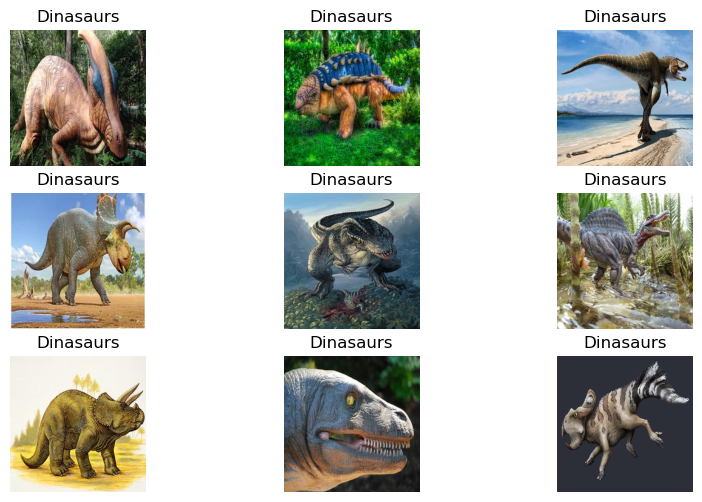

In [5]:
output_folder = f"/kaggle/working/{search_keyword}"
output_images = load_images_from_folder(output_folder)
output_labels =  [search_keyword ] * len(output_images)

show_image_grid(output_images,output_labels)

#to download the images just download the complete folder from the output kernel of the notebook

#### <div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #d2ff2; font-size:100%; text-align:left"><div style="background-color:#d4ebf2; padding: 60px;">Such a simple task😀<br><br>I Thank you for viewing my work.If you liked it, consider upvoting sharing it to others or comment your feedback to improve this notebook.<br><br>Thank you</div>